In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from sklearn.linear_model import LinearRegression
from sklearn import linear_model,model_selection
import itertools
import time
from sklearn.metrics import mean_squared_error
import seaborn as sns

print("[+] Yes sir")

[+] Yes sir


In [3]:
head = np.arange(16383)

df1 = pd.read_csv(r"C:\Users\quinn\Dropbox\20 spr\CS 440\fullspecs.csv",names=head)
df1 = df1.T
print("[+] All Good")


[+] All Good


In [3]:
cols1 = ["MSRP","EPA Fuel Economy Est - Hwy (MPG)","Passenger Capacity","Base Curb Weight (lbs)","Back-Up Camera","Brakes-ABS","Parking Aid","Rollover Protection Bars","Fuel Tank Capacity, Approx (gal)"]
cols = ["MSRP","fuel","passenger_capacity","weight","Back_up_cam","Brakes_ABS","Parking_aid","rollover","tank"]

df1 = df1[cols1]
df1 = df1.dropna()
#df1

In [4]:
#df1 = df1[cols1]
#df1 = df1[cols1]
#df1 = df1.dropna()
df1.columns = cols
#df = df1 #copy saved in df

df1['MSRP'] = df1['MSRP'].str.strip("$")
df1["Back_up_cam"] = df1.Back_up_cam.eq('Yes').mul(1)
df1["Brakes_ABS"] = df1.Brakes_ABS.eq('Yes').mul(1)
df1["Parking_aid"] = df1.Parking_aid.eq('Yes').mul(1)
df1["rollover"] = df1.Parking_aid.eq('Yes').mul(1)
df1['MSRP'] = df1.MSRP.str.split(',').str.join('').astype(int)
df1['tank'] = df1.tank.str.extract('(\d+)').astype(float)
#df1 = df1[cols]
df1['weight'] = df1.weight.str.extract('(\d+)').astype(float)

df1['fuel'] = pd.to_numeric(df1['fuel'],errors='coerce')
df1['passenger_capacity'] = pd.to_numeric(df1['passenger_capacity'],errors='coerce')

#df = df1 #copy saved in df
#df1.to_csv("main.csv")
#df1.reset_index(drop=True)
print("[+] All Good")

#df1 = pd.get_dummies(df1,columns=["Back-Up Camera","Brakes-ABS","Parking Aid","Rollover Protection Bars"],drop_first = True)

[+] All Good


C:\Users\quinn\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [5]:
df1 = df1.dropna()

In [6]:

#print(df1['weight'] < (Q1 - 1.5 * IQR)) |('weight' > (Q3 + 1.5 * IQR))

df2= df1[df1.weight > 10]
df2 = df2[df2.weight<7000]

df2 = df2[df2.tank<30]
df2 = df2[df2.tank>7.5]

df2 = df2[df2.fuel<50]

print(df1.shape,df2.shape)

(8149, 9) (8088, 9)


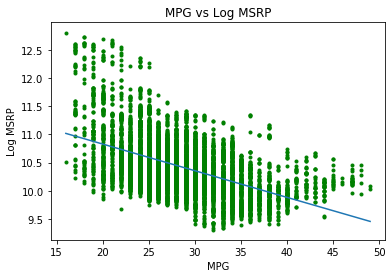

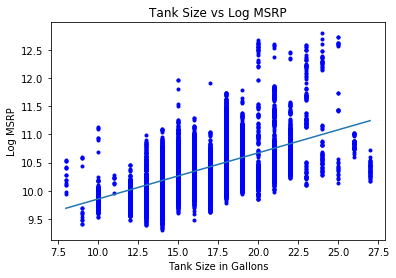

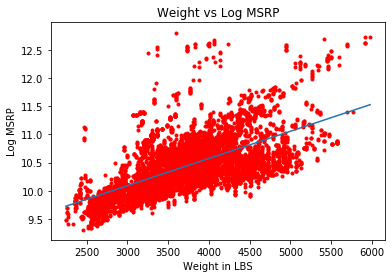

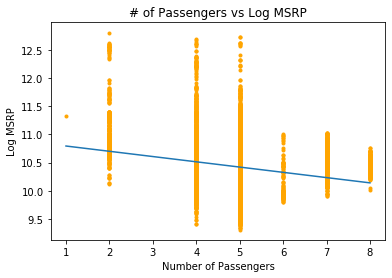

In [7]:
inputs = ["fuel","passenger_capacity","weight","Back_up_cam","Brakes_ABS","Parking_aid"]
#Assumptions


#linear
y = df2["MSRP"].tolist()
y = [np.log(j) for j in y]

x =df2['fuel'].tolist()
#x = [np.log(j) for j in x]
plt.scatter(x,y,color="g",marker = ".")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('MPG')
plt.ylabel('Log MSRP')
plt.title('MPG vs Log MSRP')

plt.show()
    

x =df2['tank'].tolist()
plt.scatter(x,y,color="b",marker = ".")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Tank Size in Gallons')
plt.ylabel('Log MSRP')
plt.title('Tank Size vs Log MSRP')
plt.show()

x =(df2['weight'])
plt.scatter(x,y,color="r",marker = ".")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Weight in LBS')
plt.ylabel('Log MSRP')
plt.title('Weight vs Log MSRP')
plt.show()

x =(df2['passenger_capacity'])
plt.scatter(x,y,color="orange",marker = ".")
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.xlabel('Number of Passengers')
plt.ylabel('Log MSRP')
plt.title('# of Passengers vs Log MSRP')
plt.show()

#independent


#Normal distribution of error terms

#Equal variance of error terms 

In [8]:
df2.head(1)

,MSRP,fuel,passenger_capacity,weight,Back_up_cam,Brakes_ABS,Parking_aid,rollover,tank
0,40600,28.0,5,3790.0,1,1,1,0,17.0


In [146]:
mlr= LinearRegression()
y = np.log(df2['MSRP'])
x = df2[['fuel', 'passenger_capacity', 'weight', 'Back_up_cam', 'Brakes_ABS', 'Parking_aid']]
mlr.fit(x,y)
print(mlr.intercept_)
print(mlr.coef_)

9.436520092867221
[-0.00408427 -0.23218638  0.00053807  0.09513961  0.21256583  0.17167863]


$\hat{log(MSRP_i)} = \beta_0 + \beta_1fuel_i + \beta_2passenger\_capacity_i +\beta_3weight_i +\beta_4Back\_up\_cam_i +\beta_5Brakes\_ABS_i +\beta_6Parking\_aid_i$

In [10]:
from tqdm import tnrange, tqdm_notebook
def fit_linear_reg(X,Y):
    #Fit linear regression model and return RSS and R squared values
    model_k = linear_model.LinearRegression(fit_intercept = True)
    model_k.fit(X,Y)
    RSS = mean_squared_error(Y,model_k.predict(X)) * len(Y)
    R_squared = model_k.score(X,Y)
    adj_R_squared = 1 - (1-R_squared)*(len(Y)-1)/(len(Y)-X.shape[1]-1-1)
    return RSS, R_squared,adj_R_squared

#df1['fuel'] =np.log(df1['fuel'])
#df2['fuel'] =np.log(df2['fuel'])
Y = np.log(df2['MSRP'])
#Y = df2['MSRP']
X = df2.drop(columns = 'MSRP', axis = 1)
print(df1.columns)
k = 8
RSS_list, R_squared_list,adj_R_squared_list, feature_list = [],[], [],[]
numb_features = []

#Looping over k = 1 to k = 11 features in X
for k in tnrange(1,len(X.columns) + 1, desc = 'Loop...'):

    #Looping over all possible combinations: from 11 choose k
    for combo in itertools.combinations(X.columns,k):
        tmp_result = fit_linear_reg(X[list(combo)],Y)   #Store temp result 
        RSS_list.append(tmp_result[0])                  #Append lists
        R_squared_list.append(tmp_result[1])
        adj_R_squared_list.append(tmp_result[2])
        feature_list.append(combo)
        numb_features.append(len(combo))   

#Store in DataFrame
df = pd.DataFrame({'numb_features': numb_features, 'R_squared':R_squared_list,"adj_R_squared":adj_R_squared_list,'features':feature_list})

Index(['MSRP', 'fuel', 'passenger_capacity', 'weight', 'Back_up_cam',
       'Brakes_ABS', 'Parking_aid', 'rollover', 'tank'],
      dtype='object')


In [55]:
df_max = df[df.groupby('numb_features')['adj_R_squared'].transform(max) == df['adj_R_squared']]
#display(df_min.head(9))
display(df_max.head(9))
df['max_R_squared'] = df.groupby('numb_features')['R_squared'].transform(max)

print(df.loc[218][3])

,numb_features,R_squared,adj_R_squared,features,max_R_squared
2,1,0.403227,0.403079,"(weight,)",0.403227
15,2,0.670733,0.670611,"(passenger_capacity, weight)",0.670733
59,3,0.700253,0.700104,"(passenger_capacity, weight, Parking_aid)",0.700253
131,4,0.712375,0.712197,"(passenger_capacity, weight, Brakes_ABS, Parki...",0.712375
197,5,0.718282,0.718073,"(passenger_capacity, weight, Back_up_cam, Brak...",0.718282
218,6,0.719156,0.718913,"(fuel, passenger_capacity, weight, Back_up_cam...",0.719156
247,7,0.719156,0.718878,"(fuel, passenger_capacity, weight, Back_up_cam...",0.719156
254,8,0.719156,0.718844,"(fuel, passenger_capacity, weight, Back_up_cam...",0.719156


('fuel', 'passenger_capacity', 'weight', 'Back_up_cam', 'Brakes_ABS', 'Parking_aid')


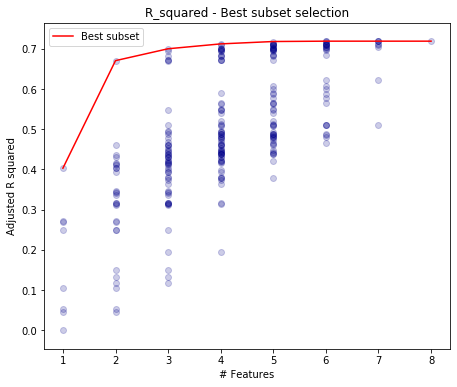

In [12]:
fig = plt.figure(figsize = (16,6))

ax = fig.add_subplot(1, 2, 2)
ax.scatter(df.numb_features,df.R_squared, alpha = .2, color = 'darkblue' )
ax.plot(df.numb_features,df.max_R_squared,color = 'r', label = 'Best subset')
ax.set_xlabel('# Features')
ax.set_ylabel('Adjusted R squared')
ax.set_title('R_squared - Best subset selection')
ax.legend()

plt.show()

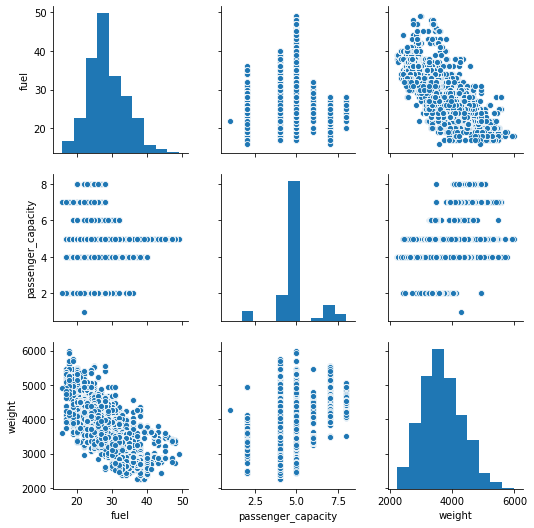

In [13]:
df3=df2[['fuel', 'passenger_capacity', 'weight']]
sns.pairplot(df3)
plt.show()

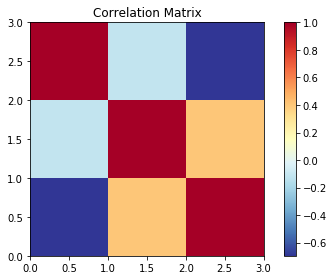

In [148]:
import statsmodels.graphics.correlation as smg
C = np.corrcoef(df3.T)

smg.plot_corr(C)

plt.show()

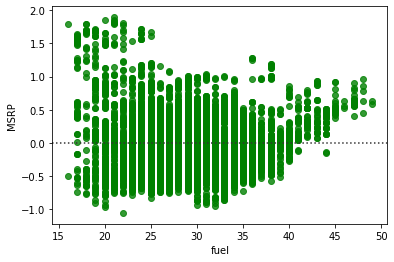

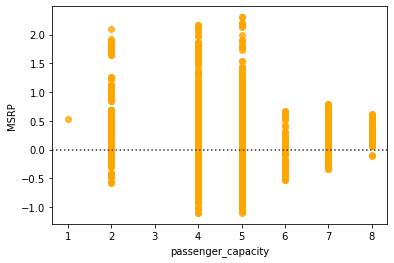

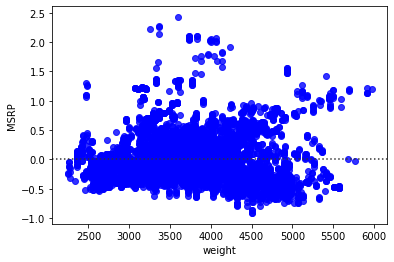

In [149]:
sns.residplot(df2['fuel'],np.log(df2['MSRP']),color='g')
plt.show()

sns.residplot(df2['passenger_capacity'],np.log(df2['MSRP']),color='orange')
plt.show()

sns.residplot(df2['weight'],np.log(df2['MSRP']),color='b')
plt.show()




In [150]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [151]:
print(df2.shape)
df2 = df2.dropna()
x= df2[['fuel', 'passenger_capacity', 'weight', 'Back_up_cam', 'Brakes_ABS', 'Parking_aid']]

y = np.log(df2['MSRP'])



import statsmodels.api as sm # import statsmodels 



X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

(8088, 9)


C:\Users\quinn\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MSRP   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.719
Method:                 Least Squares   F-statistic:                     3449.
Date:                Thu, 05 Mar 2020   Prob (F-statistic):               0.00
Time:                        22:08:31   Log-Likelihood:                -483.29
No. Observations:                8088   AIC:                             980.6
Df Residuals:                    8081   BIC:                             1030.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  9.4365      0.043    217.371      0.000       9.351       9.522
fuel                  -0.0041      0.001     -5.014      0.000      -0.006      -0.002
passenger_capacity    -0.2322      0.003    -77.483      0.000      -0.238      -0.226
weight                 0.0005   8.08e-06     66.630      0.000       0.001       0.001
Back_up_cam            0.0951      0.007     13.848      0.000       0.082       0.109
Brakes_ABS             0.2126      0.013     16.599      0.000       0.187       0.238
Parking_aid            0.1717      0.008     20.854      0.000       0.156       0.188
==============================================================================
Omnibus:                     1063.676   Durbin-Watson:                   0.360
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3171.685
Skew:                           0.697   Prob(JB):                         0.00
Kurtosis:                       5.733   Cond. No.                     5.69e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.69e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=6)



In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

y = np.log(df2['MSRP'])

clf1 = LinearRegression()


X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.1,
                     random_state=123)

score1 = clf1.fit(X_train, y_train).score(X_test, y_test)


y = df2['MSRP']
X_train, X_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.1,
                     random_state=123)

score2 = clf1.fit(X_train, y_train).score(X_test, y_test)


print(score1)
print(score2)

# Although the code for a k folds t test crapped out on us, the best was performed and a high t value was 
#returned, such that we could return a p value low enough to reject H0, that the models have the 
#same effectiveness in favor of the alternative, that tehe log(MSRP) model is more effective.

0.7165719677406734
0.46881546973551513
